In [35]:
import json
import pandas as pd
from collections import defaultdict
import datetime
import matplotlib.pyplot as plt

import math

from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.stats.proportion import proportion_confint
from statsmodels.tools.tools import add_constant
import statsmodels.formula.api as smf

import numpy as np
from scipy.stats import *
import scipy

import time

import sys
import os
import scipy

In [3]:
# Latex Configuration
import matplotlib.font_manager as font_manager
from matplotlib.lines import Line2D
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import os
params = {
    "axes.titlesize" : 16,
    'axes.labelsize': 14,
    'font.size': 14,
    'legend.fontsize': 12,
    'xtick.labelsize': 14,
    'ytick.labelsize': 14,
    'text.usetex': False
}

mpl.rcParams.update(params)
def to_year_month(t):
  if t== 0:
    return '2005/12'

  else:
    return '{}/{}'.format(int((t-1) / 12) + 2006, int(t-1) % 12 +1)

In [5]:
def mean_confidence_interval(data, confidence=0.95):
    a = 1.0 * np.array([d for d in data if ~np.isnan(d)])
    n = len(a)
    m, se = np.mean(a), scipy.stats.sem(a)
    h = se * scipy.stats.t.ppf((1 + confidence) / 2., n-1)
    return m, h

# Alternative Monetization and Content Production

In [6]:
with open('../data/matched_longevity', 'r') as r:
  total = pd.read_csv(r)

In [7]:
with open("../data/channel_video_monetize.csv", "r") as r:
  tt = pd.read_csv(r)

In [8]:
total_num = sum(tt['total'])
tt['percentage'] = tt.apply(lambda x: x['total'] / total_num, axis=1)

In [9]:
buckets = [0, 29, 53, 82, 119, 169, 239, 347, 540, 1027, 121676]
buckets_str = ['({}, {}]'.format(buckets[idx-1], buckets[idx]) for idx in range(1, 11)]

In [10]:
for x in range(3, 1, -1):
  total['videos_{}'.format(x)] = total.apply(lambda xx: xx['videos_{}'.format(x)] - xx['videos_{}'.format(x-1)],
                                             axis=1)

for x in range(12, 1, -1):
  total['videos_after_{}'.format(x)] = total.apply(lambda xx: xx['videos_after_{}'.format(x)] - xx['videos_after_{}'.format(x-1)],
                                                   axis=1)

<ipython-input-11-f40ac45bb6e0>:25: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])


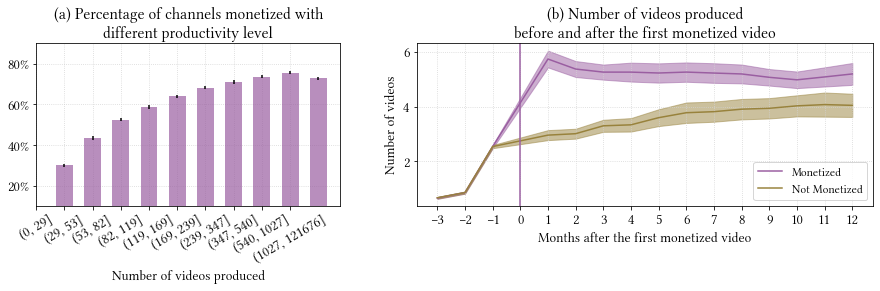

In [11]:
colors = {"monetized": "#9a5ea1",
          "not_monetized": "#98823c"}

fig, axs = plt.subplots(1, 2, figsize=(15, 3), sharex=False, gridspec_kw={'width_ratios': [1, 1.5]})

for ax in axs:
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    ax.xaxis.grid(color="#d3d3d3", ls=":", zorder=0)
    ax.yaxis.grid(color="#d3d3d3", ls=":", zorder=0)

ax = axs[0]

width = 0.6 
error = [proportion_confint(ttt[0], ttt[1]) for ttt in tt[['has_monetization', 'total']].values]
ratios = list(tt['ratio'].values)
p1 = ax.bar(range(1, 11), ratios, width, yerr = ([ratios[idx] - e[0] for idx, e in enumerate(error)],
                                                [e[1] - ratios[idx] for idx, e in enumerate(error)]), color="#9a5ea1", alpha=0.7, zorder=3)


#ax.set_ylabel('Monetized Channels (%)')
ax.set_xlabel('Number of videos produced')
ax.set_ylim(0.1, 0.9)
vals = ax.get_yticks()
#ax.set_ylabel('Percentage of Channels Monetized')
ax.set_yticklabels(['{:,.0%}'.format(x) for x in vals])
ax.set_xticks(range(10))
ax.set_title('(a) Percentage of channels monetized with\ndifferent productivity level')
ax.set_xticklabels(buckets_str, rotation=30)


# Label with label_type 'center' instead of the default 'edge'


ax = axs[1]
matching_interval = 4
xrange = [x for x in range(-matching_interval+1, 13) if x != 0]
a = [mean_confidence_interval(total[total['has_monetization']]['videos_{}'.format(x)])
     for x in range(matching_interval-1, 0, -1)] + [mean_confidence_interval(total[total['has_monetization']]['videos_after_{}'.format(x)])
                                  for x in range(1, 13)]
b = [mean_confidence_interval(total[total['no_monetization']]['videos_{}'.format(x)])
     for x in range(matching_interval-1, 0, -1)] + [
    mean_confidence_interval(total[total['no_monetization']]['videos_after_{}'.format(x)].values)
    for x in range(1, 13)]
ax.plot(xrange, [aa[0] for aa in a], label='Monetized', color = colors['monetized'])
ax.fill_between(xrange, [aa[0] - aa[1] for aa in a],
                [aa[0]+aa[1] for aa in a], 
                color = colors['monetized'], alpha=0.5)
ax.plot(xrange, [aa[0] for aa in b], label='Not Monetized', color = colors['not_monetized'])
ax.fill_between(xrange, [aa[0] - aa[1] for aa in b],
                [aa[0]+aa[1] for aa in b], 
                color = colors['not_monetized'], alpha=0.5)# ax.set_xlim([pd.to_datetime("2009"), pd.to_datetime("2018")])
ax.axvline(x=0, color="#9a5ea1")
ax.set_xticks(range(-3, 13))
ax.set_xlabel('Months after the first monetized video')
ax.set_ylabel('Number of videos')
ax.set_title('(b) Number of videos produced\nbefore and after the first monetized video')
ax.legend(loc="lower right")

#ax.set_xticklabels(xrange)



#plt.savefig('../figs/longevity.pdf', bbox_inches = "tight")  

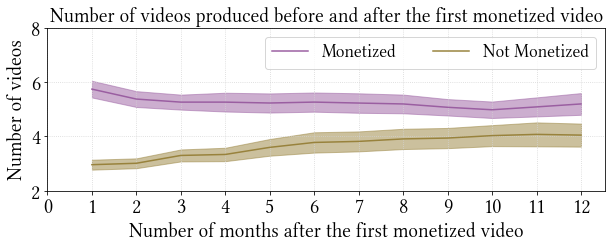

In [12]:
colors = {"monetized": "#9a5ea1",
          "not_monetized": "#98823c"}

fig, ax = plt.subplots(1, 1, figsize=(10, 3), sharex=False)


ax.xaxis.grid(color="#d3d3d3", ls=":", zorder=0)
ax.yaxis.grid(color="#d3d3d3", ls=":", zorder=0)

matching_interval = 4
xrange = [x for x in range(0, 13) if x != 0]
a = [mean_confidence_interval(total[total['has_monetization']]['videos_after_{}'.format(x)])
                                  for x in range(1, 13)]
b = [mean_confidence_interval(total[total['no_monetization']]['videos_after_{}'.format(x)].values)
    for x in range(1, 13)]
ax.plot(xrange, [aa[0] for aa in a], label='Monetized', color = colors['monetized'])
ax.fill_between(xrange, [aa[0] - aa[1] for aa in a],
                [aa[0]+aa[1] for aa in a], 
                color = colors['monetized'], alpha=0.5)
ax.plot(xrange, [aa[0] for aa in b], label='Not Monetized', color = colors['not_monetized'])
ax.fill_between(xrange, [aa[0] - aa[1] for aa in b],
                [aa[0]+aa[1] for aa in b], 
                color = colors['not_monetized'], alpha=0.5)# ax.set_xlim([pd.to_datetime("2009"), pd.to_datetime("2018")])
#ax.axvline(x=0, color="#9a5ea1")
ax.set_xticks(range(0, 13))
ax.set_ylim(2, 8)
ax.set_xlabel('Number of months after the first monetized video', fontsize=20)
ax.set_ylabel('Number of videos', fontsize=20)
ax.set_title('Number of videos produced before and after the first monetized video', fontsize=20)
ax.legend(loc="upper right", fontsize=18, ncol=2)
plt.tick_params(labelsize=20)

#ax.set_xticklabels(xrange)

# Alternative Monetization and Problematic Content Creation

In [13]:
with open("../data/problematic_content", "r") as r:
  total = pd.read_csv(r)

Text(0.5, 1.0, '(b) Number of views per year\n')

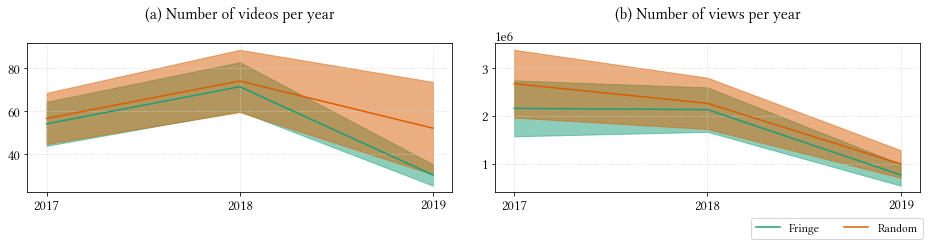

In [15]:
colors = {"fringe": "#1b9e77", 
          "others": "#d95f02"}

fig, axs = plt.subplots(1, 2, figsize=(16, 2.75), sharex=False,
                        gridspec_kw={
                                    'wspace': 0.1})


a = []
b = []
startyear = 2017

for y in range(startyear, 2020):
  a.append(mean_confidence_interval(total[total['alt_category'] != 'None']['videos_{}'.format(y)].values))
  b.append(mean_confidence_interval(total[total['alt_category'] == 'None']['videos_{}'.format(y)].values))

ax = axs[0]

ax.plot(range(startyear, 2020), [aa[0] for aa in a], label='Fringe', color = colors['fringe'])
ax.fill_between(range(startyear, 2020), [aa[0] - aa[1] for aa in a],
                [aa[0]+aa[1] for aa in a], 
                color = colors['fringe'], alpha=0.5)
ax.plot(range(startyear, 2020), [aa[0] for aa in b], label='Others', color = colors['others'])
ax.fill_between(range(startyear, 2020), [aa[0] - aa[1] for aa in b],
                [aa[0]+aa[1] for aa in b], 
                color = colors['others'], alpha=0.5)# ax.set_xlim([pd.to_datetime("2009"), pd.to_datetime("2018")])
a = []
b = []


for y in range(startyear, 2020):
  a.append(mean_confidence_interval(total[total['alt_category'] != 'None']['views_{}'.format(y)].values))
  b.append(mean_confidence_interval(total[total['alt_category'] == 'None']['views_{}'.format(y)].values))

ax = axs[1]

ax.plot(range(startyear, 2020), [aa[0] for aa in a], label='Fringe', color = colors['fringe'])
ax.fill_between(range(startyear, 2020), [aa[0] - aa[1] for aa in a],
                [aa[0]+aa[1] for aa in a], 
                color = colors['fringe'], alpha=0.5)
ax.plot(range(startyear, 2020), [aa[0] for aa in b], label='Random', color = colors['others'])
ax.fill_between(range(startyear, 2020), [aa[0] - aa[1] for aa in b],
                [aa[0]+aa[1] for aa in b], 
                color = colors['others'], alpha=0.5)# ax.set_xlim([pd.to_datetime("2009"), pd.to_datetime("2018")])
ax.legend( bbox_to_anchor=(1.02,-0.35), loc="lower right", ncol=2)
for ax in axs[:2]:
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    ax.xaxis.grid(color="#d3d3d3", ls=":")
    ax.yaxis.grid(color="#d3d3d3", ls=":")
    ax.tick_params(axis='x')
    ax.tick_params(axis='y')
    ax.set_xticks([2017, 2018, 2019])#[2007, 2009, 2011, 2013, 2015, 2017])
    ax.set_xticklabels([2017, 2018, 2019])#[2007, 2009, 2011, 2013, 2015, 2017])#, rotation=45)

axs[0].set_xticks([2017, 2018, 2019])#[2007, 2009, 2011, 2013, 2015, 2017])
axs[1].set_xticks([2017, 2018, 2019])#[2007, 2009, 2011, 2013, 2015, 2017])
axs[0].set_title('(a) Number of videos per year\n')
axs[1].set_title('(b) Number of views per year\n')

In [16]:
len(total)

722

In [17]:
def get_buckets(seq, buckets):
  last = -1
  cnts = []
  prob = []
  tt = len(seq)
  for b in buckets:
    cnts.append(len([s for s in seq if (s > last) and (s <= b)]))

    prob.append(len([s for s in seq if (s > last) and (s <= b)]) / float(tt))
    last = b
  return cnts, prob

In [18]:
def get_bucketnames(buckets):
  last = -1
  names = []
  for b in buckets:
    if last == -1:
      names.append('[0, {}]'.format( b))
    else:
      names.append('({}, {}]'.format(last, b))
    last = b
  names[-1] = '> {}\n'.format(buckets[-2])
  return names

In [19]:
def paint_bar(buckets, a, b, ax, colors, title, bucketnames=None, rotation=0):
  width = 0.45 
  N = len(buckets)
  X = np.arange(N)
  
  n_bins = 20
  ca, ba = get_buckets(a, buckets)
  cb, bb = get_buckets(b, buckets)

  ax.bar(X + 0.05, ba, color = colors['fringe'], label='Problematic', width = width, alpha=0.7, zorder=3)
  ax.bar(X + 0.05 + width, bb, color = colors['others'], label='Random', width = width, alpha=0.7, zorder=3)
  
  ax.set_xlabel('Number of Videos Produced')
  ax.set_xticks(X+0.25)
  ax.set_title(title)
  if bucketnames:
    buckets_str = bucketnames
  else:
    buckets_str = get_bucketnames(buckets)
  print(len(buckets)-1)
  print(scipy.stats.chisquare(ca, f_exp=cb, ddof=len(buckets)-1))
  print(ba, bb)
  if rotation > 0:
    ax.set_xticklabels(buckets_str, rotation=rotation, ha='right')
  else:
    ax.set_xticklabels(buckets_str)

MannwhitneyuResult(statistic=9.0, pvalue=0.2654346519842541)
[(0.6786703601108033, 0.04817251547924173, 0.04817251547924173), (0.47645429362880887, 0.051520778136248724, 0.05152077813624867), (0.11080332409972299, 0.032379474790758894, 0.032379474790758894), (0.1745152354570637, 0.039153058647977135, 0.039153058647977135), (0.5263157894736842, 0.051506512379880465, 0.051506512379880465)]
[(0.5623268698060941, 0.051175706926546605, 0.051175706926546605), (0.27977839335180055, 0.046305720818315715, 0.04630572081831574), (0.01662049861495845, 0.013187943864922698, 0.013187943864922697), (0.10803324099722991, 0.032021931747706706, 0.032021931747706706), (0.4792243767313019, 0.051533455493265434, 0.05153345549326549)]
MannwhitneyuResult(statistic=53486.5, pvalue=9.14628224616665e-06)
3
Power_divergenceResult(statistic=57.527689978623684, pvalue=nan)
[0.32132963988919666, 0.11357340720221606, 0.24376731301939059, 0.32132963988919666] [0.4376731301939058, 0.10803324099722991, 0.27977839335180

<ipython-input-22-e7abfa7adf12>:100: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(pad=0.02)


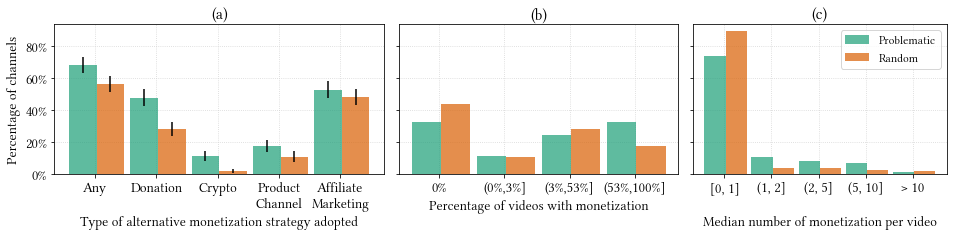

In [22]:
colors = {"fringe": "#1b9e77", 
          "others": "#d95f02"}

fig, axs = plt.subplots(1, 3, figsize=(16, 2.75), sharey=True,
                        gridspec_kw={'width_ratios': [1.3, 1.1, 1],
                                    'wspace': 0.05})

ax = axs[0]

totallen = len(total) / 2.
a = []
b = []


a.append(float(len(total[(total['alt_category'] != 'None')
                           & (total['monetized_percentage'] > 0.)])))
b.append(float(len(total[(total['alt_category'] == 'None')
                           & (total['monetized_percentage'] > 0.)])))# / totallen)


for e in ['donation', 'crypto', 'merch_channel', 'merch_others']:
  a.append(float(len(total[(total['alt_category'] != 'None')
                           & (total['videos_with_{}'.format(e)] > 0)])))# / totallen)
  b.append(float(len(total[(total['alt_category'] == 'None')
                           & (total['videos_with_{}'.format(e)] > 0)])))# / totallen)
print(scipy.stats.mannwhitneyu(a, b))

ya = [(aa / totallen, aa / totallen - proportion_confint(aa, totallen)[0],
       proportion_confint(aa, totallen)[1] - aa / totallen) for aa in a]
yb = [(aa / totallen, aa / totallen - proportion_confint(aa, totallen)[0],
       proportion_confint(aa, totallen)[1] - aa / totallen) for aa in b]


width = 0.45 
N = 5
X = np.arange(N)

print(ya)
print(yb)
ax.bar(X + 0.05, [aa[0] for aa in ya], color = colors['fringe'],
       label='Problematic', yerr = ([aa[1] for aa in ya], [aa[2] for aa in ya]),
       width = width, alpha=0.7, zorder=3)
ax.bar(X + 0.05 + width, [aa[0] for aa in yb], color = colors['others'],
       label='Random', yerr = ([aa[1] for aa in yb], [aa[2] for aa in yb]),
       width = width, alpha=0.7, zorder=3)
  
#ax.set_xlabel('Number of Videos Produced')
ax.set_xticks(X+0.25)
#ax.set_title(title)
buckets_str = ['Any', 'Donation', 'Crypto', 'Product\nChannel', 'Affiliate\nMarketing']

#print(scipy.stats.chisquare(ca, f_exp=cb, ddof=len(buckets)-1))
ax.set_xticklabels(buckets_str)#, rotation=30)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.xaxis.grid(color="#d3d3d3", ls=":", zorder=0)
ax.yaxis.grid(color="#d3d3d3", ls=":", zorder=0)


ax = axs[1]
a = total[total['alt_category'] != 'None']['monetized_percentage'].values
b = total[total['alt_category'] == 'None']['monetized_percentage'].values
buckets = [0.0, 0.03, 0.53, 1.0]

print(scipy.stats.mannwhitneyu(a, b))
bucketnames = ['0%', '(0%,3%]', '(3%,53%]',  '(53%,100%]']
paint_bar(buckets, a, b, ax, colors, "(d)", bucketnames, rotation=0)
#ax.legend(fontsize=15)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.xaxis.grid(color="#d3d3d3", ls=":", zorder=0)
ax.yaxis.grid(color="#d3d3d3", ls=":", zorder=0)


ax = axs[2]
a = total[total['alt_category'] != 'None']['median_no_monetization'].values
b = total[total['alt_category'] == 'None']['median_no_monetization'].values
print(scipy.stats.mannwhitneyu(a, b))
buckets = [1, 2, 5, 10, max(max(a), max(b))]
paint_bar(buckets, a, b, ax, colors, "(e)")

ax.legend(bbox_to_anchor=(1,1), loc="upper right", ncol=1)

ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
ax.xaxis.grid(color="#d3d3d3", ls=":", zorder=0)
ax.yaxis.grid(color="#d3d3d3", ls=":", zorder=0)



#ax.set_xticks([])

axs[0].set_title('(a)')
axs[0].set_xlabel('Type of alternative monetization strategy adopted')
axs[0].set_ylabel('Percentage of channels')

axs[1].set_title('(b)')
axs[1].set_xlabel('Percentage of videos with monetization')
axs[2].set_title('(c)')
axs[2].set_xlabel('Median number of monetization per video')
fig.tight_layout(pad=0.02)

In [ ]:
# Total

In [23]:
with open("../data/crypto_total_income.csv", "r") as r:
  cdf = pd.read_csv(r)
with open("../data/patreon_total_income.csv", "r") as r:
  pdf = pd.read_csv(r)

In [24]:
buckets = [-1, 0, 100, 1000, 10000, 100000, np.inf]

In [25]:
pdf[pdf['money'] > 10000]

,channel_id,money,channel_category,channel_not_avalible_dec_2020
0,UC595wqznMGuY2mi6DKx-qnQ,260562.927229,Manosphere,False
1,UC72vWiZdUN_Y2OC2RgJ-dvA,258552.297602,Alt-lite,False
2,UCcmnLu5cGUGeLy744WS-fsg,244847.394597,Manosphere,False
3,UCcOtHMt1S9Nl4Pycp-FWd8Q,240778.707159,Manosphere,False
4,UCAlVRoYjDbgLx7j6O2N8-2g,237479.161587,Manosphere,False
5,UC6cMYsKMx6XicFcFm7mTsmA,210797.042580,Alt-lite,False
6,UCpiCH7qvGVlzMOqy3dncA5Q,113223.571141,Alt-lite,False
7,UC2h3yPmh9TfQv2z3aTDTHHA,102905.467266,Alt-lite,True
8,UCP9oVEmpxbxmHd1_s3w6wTw,102905.467266,Alt-right,False
9,UCowcNKm1w2GGw5U_XQeduhg,102905.467266,Alt-right,True


In [26]:
len(cdf[cdf['value_usd'] > 10000])

11

In [27]:
cdf[cdf['value_usd'] > 100000]

,channel_id,value_usd,channel_category,channel_not_avalible_dec_2020
0,UCC3L8QaxqEGUiBC252GHy3w,127966.541404,Alt-lite,True


In [28]:
vals = cdf['value_usd'].values
cnts = [len([v for v in vals if (v > buckets[idx-1]) and (v <= buckets[idx])])
        for idx in range(1, 7)]

In [29]:
cnts

[1, 13, 14, 19, 10, 1]

In [31]:
tmp = [-1, 0, 100, '1K', '10K', '100K', np.inf]
bnames = ['({}, {}]'.format(tmp[idx-1], tmp[idx]) for idx in range(1, 7)]
bnames[0] = '=0'
bnames[-1] = '> 100K'

5540.339735339836
1155.029398749437


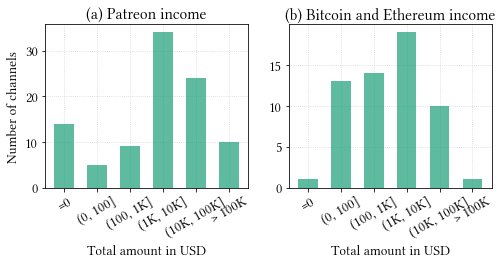

In [32]:
colors = {"monetized": "#1b9e77", 
          "not_monetized": "#d95f02"}

fig, axs = plt.subplots(1, 2, figsize=(8, 3), sharex=False, gridspec_kw={'width_ratios': [1, 1]})


ax = axs[0]

width = 0.6 
vals = pdf['money'].values
median = np.median(vals)
cnts = [len([v for v in vals if (v > buckets[idx-1]) and (v <= buckets[idx])])
        for idx in range(1, 7)]
p1 = ax.bar(range(1, 7), cnts, width, color="#1b9e77", alpha=0.7, zorder=3)

#ax.set_ylabel('Monetized Channels (%)')
ax.set_xlabel('Total amount in USD')
ax.set_ylabel('Number of channels')
ax.set_xticks(range(1, 7))
ax.set_title('(a) Patreon income')
ax.set_xticklabels(bnames, rotation=30)
print(median)

ax = axs[1]

width = 0.6 
vals = cdf['value_usd'].values
cnts = [len([v for v in vals if (v > buckets[idx-1]) and (v <= buckets[idx])])
        for idx in range(1, 7)]
p1 = ax.bar(range(1, 7), cnts, width, color="#1b9e77", alpha=0.7, zorder=3)
print(np.median(vals))


#ax.set_ylabel('Monetized Channels (%)')
ax.set_xlabel('Total amount in USD')
ax.set_xticks(range(1, 7))
ax.set_title('(b) Bitcoin and Ethereum income')
ax.set_xticklabels(bnames, rotation=30)



for ax in axs:
    #ax.yaxis.set_major_formatter(ticker.PercentFormatter(xmax=1))
    ax.xaxis.grid(color="#d3d3d3", ls=":", zorder=0)
    ax.yaxis.grid(color="#d3d3d3", ls=":", zorder=0)

